In [161]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
os.listdir('.')
# os.chdir('drive/My Drive/Colab_Test/Dataset/Classification')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv', 'iris']

In [163]:
dataset = pd.read_csv('heart.csv')

In [164]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [166]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [167]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Exploratory Data Analyst (EDA)**

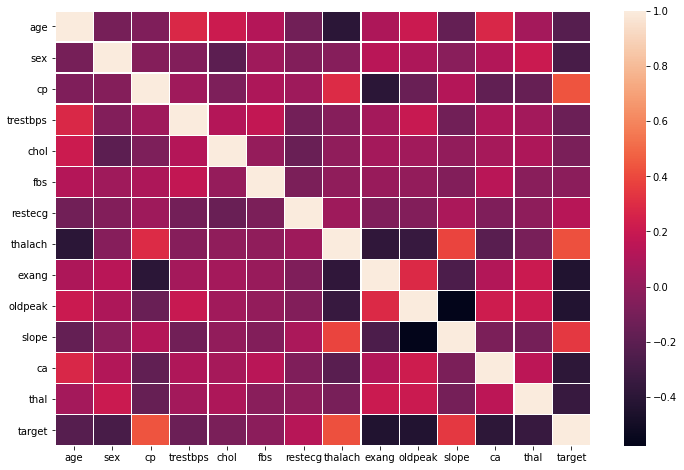

In [168]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, linewidths=0.3)

**Machine Learning**

In [169]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [170]:
label = dataset['target']
feature = dataset.drop(['target'], axis = 1)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_scale = scaler.fit_transform(feature.values)

In [172]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 20, random_state = 25)

In [173]:
print('Target dengan angka 0 : ', len(label_train[label_train == 0]))
print('Target dengan angka 1 : ', len(label_train[label_train == 1]))

Target dengan angka 0 :  128
Target dengan angka 1 :  155


**1. Logistic Regression**

In [174]:
log_reg = LogisticRegression()
log_reg.fit(feature_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
log_reg = LogisticRegression()
log_reg.fit(feature_train, label_train)

predictions = log_reg.predict(feature_train)

print("Training Result Logistic Regression -> \n")
print(f"Accuracy from Logistic Regression is          : {round(log_reg.score(feature_train, label_train),2)}")
print(f"F1 Score from Logistic Regression is         : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Logistic Regression is  : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Logistic Regression is     : {recall_score(label_train, predictions, average='macro')}\n")


print("=========="*5)

predictions = log_reg.predict(feature_test)

print("Testing Result Logistic Regression -> \n")
print(f"Accuracy from Logistic Regression is          : {round(log_reg.score(feature_test, label_test),2)}")
print(f"F1 Score from Logistic Regression is         : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Logistic Regression is  : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Logistic Regression is     : {recall_score(label_test, predictions, average='macro')}")

Training Result Logistic Regression -> 

Accuracy from Logistic Regression is          : 0.87
F1 Score from Logistic Regression is         : 0.8625511247443762
Precision Score from Logistic Regression is  : 0.8719454887218046
Recall Score from Logistic Regression is     : 0.8590473790322581

Testing Result Logistic Regression -> 

Accuracy from Logistic Regression is          : 0.7
F1 Score from Logistic Regression is         : 0.6969696969696968
Precision Score from Logistic Regression is  : 0.7083333333333333
Recall Score from Logistic Regression is     : 0.7


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [176]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



**2. SVM**

In [177]:
svm_classifier = SVC(kernel = 'linear')

svm_classifier.fit(feature_train, label_train)
predictions = svm_classifier.predict(feature_train)

print("Training Result SVM -> \n")
print(f"Accuracy from SVM is          : {round(svm_classifier.score(feature_train, label_train),2)}")
print(f"F1 Score from SVM is         : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from SVM is  : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from SVM is     : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)


predictions = svm_classifier.predict(feature_test)

print("Testing Result SVM -> \n")
print(f"Accuracy from SVM is          : {round(svm_classifier.score(feature_test, label_test),2)}")
print(f"F1 Score from SVM is         : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from SVM is  : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from SVM is     : {recall_score(label_test, predictions, average='macro')}")

Training Result SVM -> 

Accuracy from SVM is          : 0.88
F1 Score from SVM is         : 0.8732614231059588
Precision Score from SVM is  : 0.8838780641106223
Recall Score from SVM is     : 0.8694052419354839

Testing Result SVM -> 

Accuracy from SVM is          : 0.7
F1 Score from SVM is         : 0.6969696969696968
Precision Score from SVM is  : 0.7083333333333333
Recall Score from SVM is     : 0.7


In [178]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



**3. Random Forest Classifier**

In [179]:
for i in range(50, 1001, 50) :
  random_forest = RandomForestClassifier(n_estimators= 50, bootstrap= True, max_features='sqrt')
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_train)

  print(f"Training Result Random Forest Classifier, with n_estimators = {i} -> \n")
  print(f"Accuracy from Random Forest Classifier is          : {random_forest.score(feature_train, label_train)}")
  print(f"F1 Score from Random Forest Classifier is         : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from Random Forest Classifier is  : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from Random Forest Classifier is     : {recall_score(label_train, predictions, average='macro')}\n")



print("=========="*5)

for i in range(50, 1001, 50) :
  random_forest = RandomForestClassifier(n_estimators= i, bootstrap= True, max_features='sqrt')
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_test)
  print(f"Testing Result Random Forest Classifier, with n_estimators = {i} -> \n")
  print(f"Accuracy from Random Forest Classifier is          : {random_forest.score(feature_test, label_test)}")
  print(f"F1 Score from Random Forest Classifier is         : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from Random Forest Classifier is  : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from Random Forest Classifier is     : {recall_score(label_test, predictions, average='macro')}\n")


Training Result Random Forest Classifier, with n_estimators = 50 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 100 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 150 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 200 -> 

Accuracy from Random Forest Classifier 

In [180]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.73      0.80      0.76        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



**4. k-NN**

In [181]:
for i in range(1, 30, 2) :
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_train)

  print(f"Training Result k-NN, with n_neighbors = {i} -> \n")
  print(f"Accuracy from k-NN is           : {knn.score(feature_train, label_train)}")
  print(f"F1 Score from k-NN is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from k-NN is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from k-NN is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)
print(" ")
for i in range(1, 30, 2) :
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_test)

  print(f"Testing Result k-NN, with n_neighbors = {i} -> \n")
  print(f"Accuracy from k-NN is           : {knn.score(feature_test, label_test)}")
  print(f"F1 Score from k-NN is          : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from k-NN is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from k-NN is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result k-NN, with n_neighbors = 1 -> 

Accuracy from k-NN is           : 1.0
F1 Score from k-NN is          : 1.0
Precision Score from k-NN is   : 1.0
Recall Score from k-NN is      : 1.0

Training Result k-NN, with n_neighbors = 3 -> 

Accuracy from k-NN is           : 0.7632508833922261
F1 Score from k-NN is          : 0.7605601788127139
Precision Score from k-NN is   : 0.7612405063291139
Recall Score from k-NN is      : 0.760055443548387

Training Result k-NN, with n_neighbors = 5 -> 

Accuracy from k-NN is           : 0.7703180212014135
F1 Score from k-NN is          : 0.7665401748886322
Precision Score from k-NN is   : 0.7695480631276901
Recall Score from k-NN is      : 0.7651461693548387

Training Result k-NN, with n_neighbors = 7 -> 

Accuracy from k-NN is           : 0.7597173144876325
F1 Score from k-NN is          : 0.7555386178861787
Precision Score from k-NN is   : 0.7589368258859784
Recall Score from k-NN is      : 0.7541078629032258

Training Result k-NN, with n_

In [182]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



**5. Naiv Bayes**

In [183]:
n_bayes = MultinomialNB()
n_bayes.fit(feature_train, label_train)

predictions = n_bayes.predict(feature_train)

print(f"Training Result Naiv Bayes -> \n")
print(f"Accuracy from Naiv Bayes is           : {round(n_bayes.score(feature_train, label_train),2)}")
print(f"F1 Score from Naiv Bayes is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Naiv Bayes is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Naiv Bayes is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

predictions = n_bayes.predict(feature_test)

print(f"Testing Result Naiv Bayes -> \n")
print(f"Accuarcy from Naiv Bayes is           : {n_bayes.score(feature_test, label_test)}")
print(f"F1 Score from Naiv Bayes is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Naiv Bayes is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Naiv Bayes is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Naiv Bayes -> 

Accuracy from Naiv Bayes is           : 0.75
F1 Score from Naiv Bayes is          : 0.7492405063291139
Precision Score from Naiv Bayes is   : 0.750840036656145
Recall Score from Naiv Bayes is      : 0.748336693548387

Testing Result Naiv Bayes -> 

Accuarcy from Naiv Bayes is           : 0.7
F1 Score from Naiv Bayes is          : 0.7
Precision Score from Naiv Bayes is   : 0.7
Recall Score from Naiv Bayes is      : 0.7



In [184]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



**6. Linear Discriminant Analysis**

In [185]:
lda = LinearDiscriminantAnalysis() 
lda.fit(feature_train, label_train)
predictions = lda.predict(feature_train)

print(f"Training Result Linear Discriminant Analysis ->\n")
print(f"Accurcy from Linear Discriminant Analysis is           : {round(n_bayes.score(feature_train, label_train),2)}")
print(f"F1 Score from Linear Discriminant Analysis is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Linear Discriminant Analysis is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Linear Discriminant Analysis is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

predictions = lda.predict(feature_test)

print(f"Testing Result Linear Discriminant Analysis ->\n")
print(f"Accuracy from Linear Discriminant Analysis is           : {round(n_bayes.score(feature_test, label_test),2)}")
print(f"F1 Score from Linear Discriminant Analysis is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Linear Discriminant Analysis is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Linear Discriminant Analysis is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Linear Discriminant Analysis ->

Accurcy from Linear Discriminant Analysis is           : 0.75
F1 Score from Linear Discriminant Analysis is          : 0.8581088898887961
Precision Score from Linear Discriminant Analysis is   : 0.8727166525063721
Recall Score from Linear Discriminant Analysis is      : 0.8537802419354839

Testing Result Linear Discriminant Analysis ->

Accuracy from Linear Discriminant Analysis is           : 0.7
F1 Score from Linear Discriminant Analysis is          : 0.6969696969696968
Precision Score from Linear Discriminant Analysis is   : 0.7083333333333333
Recall Score from Linear Discriminant Analysis is      : 0.7



In [186]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



**7. Decision Tree Classifier**

In [187]:
for i in range(1, 31, 1) :
  t_classifier = tree.DecisionTreeClassifier(max_depth=i)
  t_classifier.fit(feature_train, label_train)
  predictions = t_classifier.predict(feature_train)


  print(f"Training Result Decision Tree Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from Decision Tree Classifier is           : {round(t_classifier.score(feature_train, label_train),2)}")
  print(f"F1 Score from Decision Tree Classifier is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from Decision Tree Classifier is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from Decision Tree Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

for i in range(1, 31, 1) :
  t_classifier = tree.DecisionTreeClassifier(max_depth=i)
  t_classifier.fit(feature_train, label_train)
  predictions = t_classifier.predict(feature_test)
  
  print(f"Testing Result Decision Tree Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from Decision Tree Classifier is           : {round(t_classifier.score(feature_test, label_test),2)}")
  print(f"F1 Score from Decision Tree Classifier is          : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from Decision Tree Classifier is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from Decision Tree Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Decision Tree Classifier, with max_depth : 1 ->

Accuracy from Decision Tree Classifier is           : 0.76
F1 Score from Decision Tree Classifier is          : 0.7618114440047736
Precision Score from Decision Tree Classifier is   : 0.761328320802005
Recall Score from Decision Tree Classifier is      : 0.7627772177419354

Training Result Decision Tree Classifier, with max_depth : 2 ->

Accuracy from Decision Tree Classifier is           : 0.77
F1 Score from Decision Tree Classifier is          : 0.7536720705037537
Precision Score from Decision Tree Classifier is   : 0.8250678908573645
Recall Score from Decision Tree Classifier is      : 0.7534022177419355

Training Result Decision Tree Classifier, with max_depth : 3 ->

Accuracy from Decision Tree Classifier is           : 0.86
F1 Score from Decision Tree Classifier is          : 0.8504556058204127
Precision Score from Decision Tree Classifier is   : 0.8672552166934189
Recall Score from Decision Tree Classifier is      

In [188]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



**8. XGBoost Classifier**

In [189]:
for i in range(10, 301, 50) :
  xg_class = xgb.XGBClassifier(objective='reg:linear', n_estimators=i)
  xg_class.fit(feature_train, label_train)
  predictions = xg_class.predict(feature_train)
 
  print(f"Training Result XGBoost Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from XGBoost Classifier is           : {round(xg_class.score(feature_train, label_train),2)}")
  print(f"F1 Score from XGBoost Classifier is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from XGBoost Classifier is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from XGBoost Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

print("========="*5)

for i in range(10, 301, 50) :
  xg_class = xgb.XGBClassifier(objective='reg:linear', n_estimators=i)
  xg_class.fit(feature_train, label_train)
  predictions = xg_class.predict(feature_test)

  print(f"Testing Result XGBoost Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from XGBoost Classifier is           : {round(t_classifier.score(feature_test, label_test),2)}")
  print(f"F1 Score from XGBoost Classifieris           : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from XGBoost Classifier is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from XGBoost Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")

[08:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Result XGBoost Classifier, with max_depth : 10 ->

Accuracy from XGBoost Classifier is           : 0.89
F1 Score from XGBoost Classifier is          : 0.8845015814712784
Precision Score from XGBoost Classifier is   : 0.8924789785113671
Recall Score from XGBoost Classifier is      : 0.8811239919354839

[08:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Result XGBoost Classifier, with max_depth : 60 ->

Accuracy from XGBoost Classifier is           : 0.95
F1 Score from XGBoost Classifier is          : 0.9463099981028267
Precision Score from XGBoost Classifier is   : 0.9484247967479675
Recall Score from XGBoost Classifier is      : 0.9448084677419355

[08:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squareder

**9. Ridge Classifier**

In [190]:
r_class = RidgeClassifier()
r_class.fit(feature_train, label_train)

predictions = r_class.predict(feature_train)

print(f"Training Result Ridge Classifier ->\n")
print(f"Accuracy from Ridge Classifier is          : {round(xg_class.score(feature_train, label_train),2)}")
print(f"F1 Score from Ridge Classifier is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Ridge Classifier is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Ridge Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

predictions = r_class.predict(feature_test)

print(f"Testing Result Ridge Classifier ->\n")
print(f"Accuracy from Ridge Classifier is          : {round(xg_class.score(feature_test, label_test),2)}")
print(f"F1 Score from Ridge Classifier is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Ridge Classifier is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Ridge Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")


Training Result Ridge Classifier ->

Accuracy from Ridge Classifier is          : 0.99
F1 Score from Ridge Classifier is          : 0.8581088898887961
Precision Score from Ridge Classifier is   : 0.8727166525063721
Recall Score from Ridge Classifier is      : 0.8537802419354839

Testing Result Ridge Classifier ->

Accuracy from Ridge Classifier is          : 0.7
F1 Score from Ridge Classifier is          : 0.6969696969696968
Precision Score from Ridge Classifier is   : 0.7083333333333333
Recall Score from Ridge Classifier is      : 0.7



**10. GaussianNB**

In [191]:
gnb = GaussianNB()
gnb.fit(feature_train, label_train)
predictions = gnb.predict(feature_train)

print(f"Training Result GausianNB ->\n")
print(f"Accuracy from GausianNB is          : {round(xg_class.score(feature_train, label_train),2)}")
print(f"F1 Score from GausianNB is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from GausianNB is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from GausianNB is      : {recall_score(label_train, predictions, average='macro')}\n")

predictions = gnb.predict(feature_test)

print(f"Testing Result GausianNB ->\n")
print(f"Accuracy from GausianNB is          : {round(xg_class.score(feature_test, label_test),2)}")
print(f"F1 Score from GausianNB is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from GausianNB is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from GausianNB is      : {recall_score(label_test, predictions, average='macro')}\n")


Training Result GausianNB ->

Accuracy from GausianNB is          : 0.99
F1 Score from GausianNB is          : 0.8421079326435382
Precision Score from GausianNB is   : 0.8452453987730062
Recall Score from GausianNB is      : 0.8403729838709677

Testing Result GausianNB ->

Accuracy from GausianNB is          : 0.7
F1 Score from GausianNB is          : 0.849624060150376
Precision Score from GausianNB is   : 0.8535353535353536
Recall Score from GausianNB is      : 0.8500000000000001



Berdasarkan dataset Heart tersebut, **besar kemungkian adanya penyakit jantung pada pasien adalah sebesar 95%**. Angka tersebut didapatkan dengan melakukan pengujian akurasi dengan menggunakan algoritma Decision Tree Classifier

Persentase diatas didapat dengan penggunaan hyperparameter, yaitu max_depth 